<a href="https://colab.research.google.com/github/StanNieboer/CoLab/blob/main/AnalyseData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***CNN Quest Knie-artrose***
Met deze code kan aan de hand van een CCN verschillende looppatronenen met elkaar vergeleken worden.


# Add drive
- De drive wordt gemount
- De directory wordt aangeroepen en aangemaakt



In [199]:
# Add google drive
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [200]:
import os

root_dir = "/content/drive/MyDrive/"

project_folder = "Colab Notebooks/Quest Artrose/"

def create_and_set_working_dir(project_folder):
  if os.path.isdir(root_dir + project_folder) == False:
    os.mkdir(root_dir + project_folder)
    print(root_dir + project_folder + 'dir did not exist') 

  os.chdir(root_dir + project_folder)

create_and_set_working_dir(project_folder)  

# Haal data op
- CSV files uitlezen
- Data shapen


In [201]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# import warnings
import warnings
# filter warnings
warnings.filterwarnings('ignore')


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

# import os
print(os.listdir("/content/drive/MyDrive/Colab Notebooks/Quest Artrose"))

# Any results you write to the current directory are saved as output.
print("hello world")

['Data', 'Test', 'AnalyseData.ipynb']
hello world


In [202]:
# read train data
train = pd.read_csv("Data/Xsens_normaal_train.csv", sep=';')
train = pd.read_csv("Data/Xsens_normaal_train.csv")

print(train.shape)
train.head()

(3882, 5)


,Label,Quat_W,Quat_X,Quat_Y,Quat_Z
0,1,0.600603,0.474262,0.511828,0.390363
1,1,0.558414,0.510745,0.503389,0.417028
2,1,0.514265,0.544209,0.492622,0.443501
3,1,0.469955,0.574562,0.478875,0.468722
4,1,0.426841,0.602877,0.460815,0.491930


In [203]:
# read test data
test = pd.read_csv("Data/Xsens_normaal_test_louis.csv", sep=';')
test = pd.read_csv("Data/Xsens_normaal_test_louis.csv")

print(test.shape)
test.head()

(6950, 4)


,Quat_W,Quat_X,Quat_Y,Quat_Z
0,0.691667,0.722094,0.012767,0.003787
1,0.691699,0.722062,0.012755,0.003812
2,0.691734,0.722029,0.012731,0.003817
3,0.691777,0.721988,0.012723,0.003814
4,0.691829,0.721938,0.012749,0.003825


In [204]:
# put labels into y_train variable
Y_train = train["Label"]
# Drop 'label' column
X_train = train.drop(labels = ["Label"],axis = 1)


3    1398
1    1215
4     748
2     521
Name: Label, dtype: int64

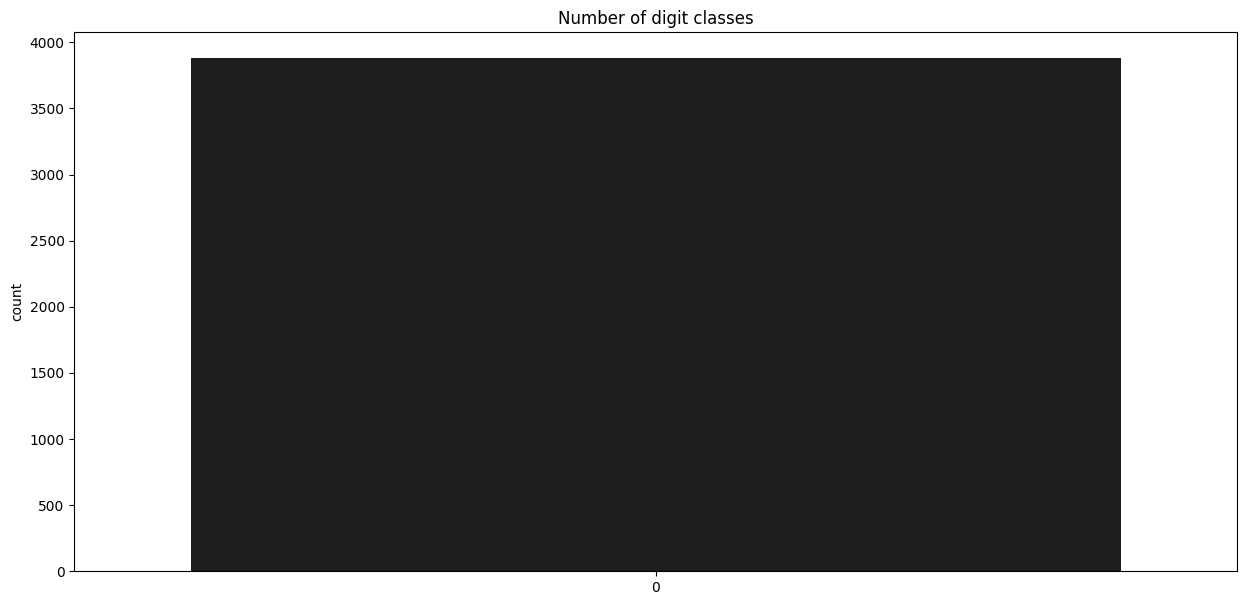

In [205]:
# visualize number of digits classes
plt.figure(figsize=(15,7))
g = sns.countplot(Y_train, palette="icefire")
plt.title("Number of digit classes")
Y_train.value_counts()

In [206]:
print("x_train shape: ",X_train.shape)
print("test shape: ",test.shape)

x_train shape:  (3882, 4)
test shape:  (6950, 4)


In [207]:
X_train = X_train.values.reshape(3882,1,4)
test = test.values.reshape(6950,1,4)
print("x_train shape: ",X_train.shape)
print("test shape: ",test.shape)
print(np.unique(Y_train))

x_train shape:  (3882, 1, 4)
test shape:  (6950, 1, 4)
[1 2 3 4]


# Reshapen en encoderen

In [208]:
# Label Encoding 
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
Y_train = to_categorical(Y_train - 1, num_classes = 4)

In [209]:
# Split the train and the validation set for the fitting
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=2)
print("x_train shape",X_train.shape)
print("x_test shape",X_val.shape)
print("y_train shape",Y_train.shape)
print("y_test shape",Y_val.shape)

x_train shape (3493, 1, 4)
x_test shape (389, 1, 4)
y_train shape (3493, 4)
y_test shape (389, 4)


# Model creëren

In [210]:
# 
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

model = Sequential()
#
model.add(Conv2D(filters = 8, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (1,4,1)))
model.add(MaxPool2D(pool_size=(1,2)))
model.add(Dropout(0.25))
#
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(1,2), strides=(1,2)))
model.add(Dropout(0.25))
# fully connected
model.add(Flatten())
model.add(Dense(128, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(4, activation = "softmax"))

In [211]:
# Define the optimizer
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

# Model compileren

In [212]:
# Compile the model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [213]:
epochs = 10  # for better result increase the epochs
batch_size = 32

In [214]:
history = model.fit(X_train, Y_train, batch_size = batch_size, epochs = epochs, validation_data = (X_val, Y_val), verbose = 2)


Epoch 1/10
110/110 - 3s - loss: 1.0826 - accuracy: 0.5150 - val_loss: 0.6039 - val_accuracy: 0.6735 - 3s/epoch - 28ms/step
Epoch 2/10
110/110 - 1s - loss: 0.4774 - accuracy: 0.8148 - val_loss: 0.1311 - val_accuracy: 1.0000 - 789ms/epoch - 7ms/step
Epoch 3/10
110/110 - 1s - loss: 0.2456 - accuracy: 0.9175 - val_loss: 0.0470 - val_accuracy: 1.0000 - 750ms/epoch - 7ms/step
Epoch 4/10
110/110 - 1s - loss: 0.1764 - accuracy: 0.9422 - val_loss: 0.0175 - val_accuracy: 1.0000 - 553ms/epoch - 5ms/step
Epoch 5/10
110/110 - 1s - loss: 0.1438 - accuracy: 0.9485 - val_loss: 0.0113 - val_accuracy: 1.0000 - 525ms/epoch - 5ms/step
Epoch 6/10
110/110 - 1s - loss: 0.1012 - accuracy: 0.9699 - val_loss: 0.0057 - val_accuracy: 1.0000 - 505ms/epoch - 5ms/step
Epoch 7/10
110/110 - 1s - loss: 0.1066 - accuracy: 0.9614 - val_loss: 0.0044 - val_accuracy: 1.0000 - 524ms/epoch - 5ms/step
Epoch 8/10
110/110 - 1s - loss: 0.0898 - accuracy: 0.9688 - val_loss: 0.0042 - val_accuracy: 1.0000 - 582ms/epoch - 5ms/step
Ep

# Model plotten

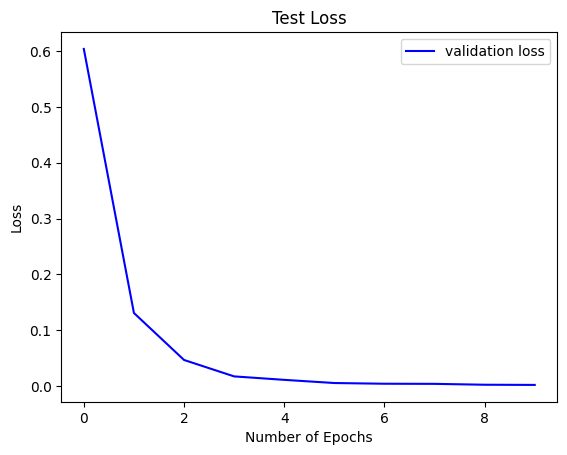

In [215]:
# Plot the loss and accuracy curves for training and validation 
plt.plot(history.history['val_loss'], color='b', label="validation loss")
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

13/13 [==============================] - 0s 3ms/step


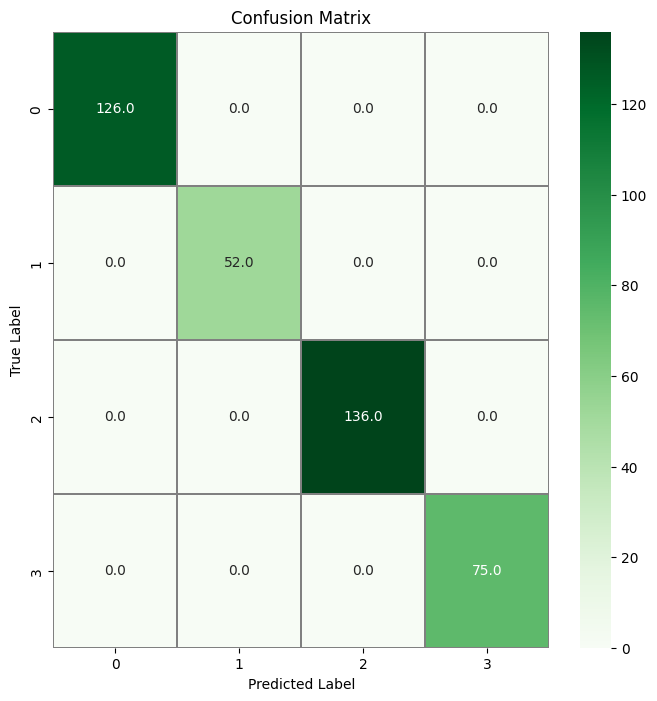

In [216]:
# confusion matrix
import seaborn as sns
# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()